In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.datasets import mnist

# Import Mnist dataset from keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train =x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

# Normalization
x_train = x_train / 255
x_test = x_test / 255

Using TensorFlow backend.


## Logistic Regression



In [11]:
from src.regression import LogisticRegression

clf = LogisticRegression(10)
clf.fit(x_train[:1000], y_train[:1000], mode ='None')
pred = clf.predict(x_test)
print(pred)
print("准确率：{:8.6} %".format((pred  == y_test).mean() * 100))

[7. 5. 1. ... 9. 8. 6.]
准确率：    79.3 %


## GMM

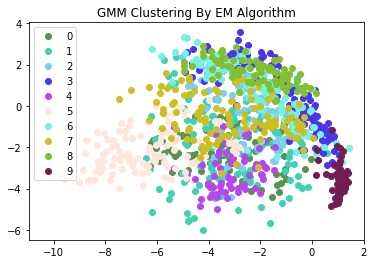

In [8]:
from src.GMM import GMM
%matplotlib inline
from utils.PCA import PCA

import numpy as np
model = GMM(10, 100)

X = PCA(x_train[:1000], 10)

pred = model.fit(X, y_train[:1000])
model.plot2d()
data = model.plot3d()


In [10]:
import random
from pyecharts import options as  opts
from pyecharts.charts import Scatter3D
from pyecharts.faker import Faker

#print(data)
#Scatter_data = [(random.randint(0,50),random.randint(0,50),random.randint(0,50),random.randint(0,50)) for i in range(50)]
scatter = Scatter3D(init_opts = opts.InitOpts(width='900px',height='900px'))  #初始化
scatter.add("",data,
         grid3d_opts=opts.Grid3DOpts(
            width=100, depth=100, height=100
        ),
        xaxis3d_opts=opts.Axis3DOpts(
            name="X",
            type_="value",
            # textstyle_opts=opts.TextStyleOpts(color="#fff"),
        ),
        yaxis3d_opts=opts.Axis3DOpts(
            name="Y",
            type_="value",
            # textstyle_opts=opts.TextStyleOpts(color="#fff"),
        ),
        zaxis3d_opts=opts.Axis3DOpts(
            name="Z",
            type_="value",
            # textstyle_opts=opts.TextStyleOpts(color="#fff"),
        ))
scatter.render_notebook()

## SVM

In [5]:
from src.SVM import SVM
SIZE = 100
model = SVM(SIZE)
model.predict(x_train, y_train, x_test, y_test)

[[ 910    0   19    3    2   30   13    2    1    0]
 [   0 1074   10    3    0   24    1    7   16    0]
 [   7    7  929    9   14   19   13   17   12    5]
 [   1    2   38  851    0   66    4   13   26    9]
 [   1    0    6    2  920    3   11    0    4   35]
 [   6    9   10   91   32  714    7   15    4    4]
 [   4    2   40    3   31   26  852    0    0    0]
 [   1    7   42   11   21    8    0  900    2   36]
 [   5    6   26   55   17  144   17   16  622   66]
 [   3    2   25   27  118   30    0   36    2  766]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       980
           1       0.97      0.95      0.96      1135
           2       0.81      0.90      0.85      1032
           3       0.81      0.84      0.82      1010
           4       0.80      0.94      0.86       982
           5       0.67      0.80      0.73       892
           6       0.93      0.89      0.91       958
           7       0.89      0.88   

array([7, 2, 1, ..., 4, 4, 6], dtype=int64)

## Neural Network

In [2]:
from src.NN import SimpleNN, transferY
model = SimpleNN('kullback_leibler_divergence')
model.fit(x_train, transferY(y_train))
model.predict(x_test, transferY(y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

KeyboardInterrupt: 

## VAE

In [6]:
from src.VAE import VAE, loss_function

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
])
trainset = torchvision.datasets.MNIST(root='./dataset', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testset = torchvision.datasets.MNIST(root='./dataset', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

vae = VAE()
optimizer = torch.optim.Adam(vae.parameters(), lr=0.0005)
for epoch in range(20):
    vae.train()
    all_loss = 0.
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to('cpu'), targets.to('cpu')
        real_imgs = torch.flatten(inputs, start_dim=1)
        gen_imgs, mu, logvar = vae(real_imgs)
        loss = loss_function(gen_imgs, real_imgs, mu, logvar)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        all_loss += loss.item()
    print('Epoch {}, loss: {:.6f}'.format(epoch, all_loss/(batch_idx+1)))
    fake_images = gen_imgs.view(-1, 1, 28, 28)
    real_images = real_imgs.view(-1, 1, 28, 28)




ModuleNotFoundError: No module named 'torch'